# 라인 플롯으로 연속변수의 추세 조사
- 일정 시간 간격에 걸쳐 연속변수의 값을 시각화 할 때 라인 플롯을 사용
- 구간 수가 적다면 막대 그래프도 사용함
---
## 데이터 : 코로나19 일일 확진자 수 데이터
- 일별 신규 확진자 수와 사망자 수를 국가별로 집계(매일)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
coviddaily = pd.read_csv('data/coviddaily720.csv', parse_dates=['casedate'])

In [3]:
coviddaily.sample(2, random_state=1).T

,2478,9526
iso_code,BRB,FRA
casedate,2020-06-11 00:00:00,2020-02-16 00:00:00
location,Barbados,France
continent,North America,Europe
new_cases,4.0,0.0
new_deaths,0.0,0.0
population,287371.0,65273512.0
pop_density,664.463,122.578
median_age,39.8,42.0
gdp_per_capita,16978.068,38605.671


### 일일 신규 확진자 및 사망자 계산

In [4]:
coviddailytotals = coviddaily.loc[coviddaily.casedate.between('2020-02-01', '2020-07-12')].groupby(['casedate'])[['new_cases', 'new_deaths']].sum().reset_index()

In [5]:
coviddailytotals.sample(7, random_state=1)

,casedate,new_cases,new_deaths
44,2020-03-16,12386.0,757.0
47,2020-03-19,20130.0,961.0
94,2020-05-05,77474.0,3998.0
78,2020-04-19,80127.0,6005.0
160,2020-07-10,228608.0,5441.0
11,2020-02-12,2033.0,97.0
117,2020-05-28,102619.0,5168.0


### 일일 신규 확진자 및 사망자 라인 플롯

In [6]:
"""
fig = plt.figure()
plt.suptitle('New Covid Cases and Deaths by Day Worldwide in 2020')
ax1 = plt.subplots(2, 1, 1)
ax1.plot(coviddailytotals.casedate, coviddailytotals.new_cases)
ax1.xaxis.set_major_formatter(DateFormatter('%b'))
ax1.set_xlabel('New Cases')

ax2 = plt.subplots(2, 1, 2)
ax2.plot(coviddailytotals.casedate, coviddailytotals.new_deaths)
ax2.xaxis.set_major_formatter(DateFormatter('%b'))
ax2.set_xlabel('New Deaths')
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
"""

"\nfig = plt.figure()\nplt.suptitle('New Covid Cases and Deaths by Day Worldwide in 2020')\nax1 = plt.subplots(2, 1, 1)\nax1.plot(coviddailytotals.casedate, coviddailytotals.new_cases)\nax1.xaxis.set_major_formatter(DateFormatter('%b'))\nax1.set_xlabel('New Cases')\n\nax2 = plt.subplots(2, 1, 2)\nax2.plot(coviddailytotals.casedate, coviddailytotals.new_deaths)\nax2.xaxis.set_major_formatter(DateFormatter('%b'))\nax2.set_xlabel('New Deaths')\nplt.tight_layout()\nfig.subplots_adjust(top=0.88)\nplt.show()\n"

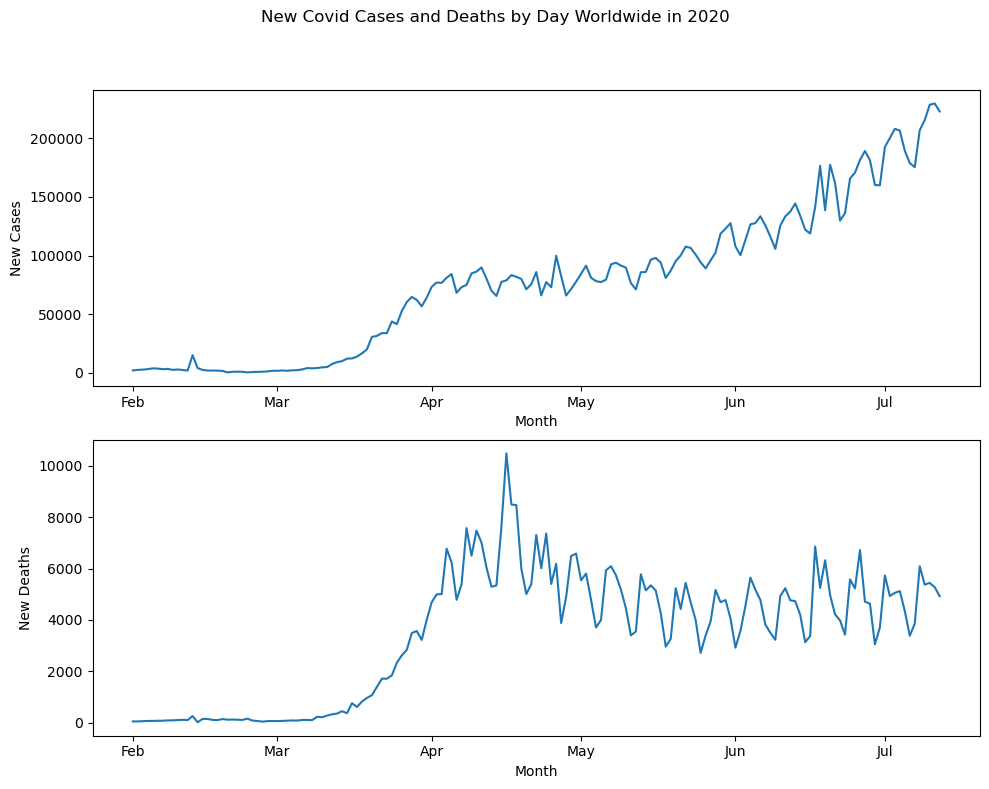

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 가정: coviddailytotals는 이미 정의된 DataFrame이며, casedate, new_cases, new_deaths 열을 포함하고 있음

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))  # 2개의 서브플롯을 생성
plt.suptitle('New Covid Cases and Deaths by Day Worldwide in 2020')

# 첫 번째 서브플롯: 신규 확진자 수
ax1.plot(coviddailytotals.casedate, coviddailytotals.new_cases)
ax1.xaxis.set_major_formatter(DateFormatter('%b'))  # X축 날짜 형식 설정
ax1.set_xlabel('Month')
ax1.set_ylabel('New Cases')

# 두 번째 서브플롯: 신규 사망자 수
ax2.plot(coviddailytotals.casedate, coviddailytotals.new_deaths)
ax2.xaxis.set_major_formatter(DateFormatter('%b'))  # X축 날짜 형식 설정
ax2.set_xlabel('Month')
ax2.set_ylabel('New Deaths')

plt.tight_layout()
fig.subplots_adjust(top=0.88)  # 상단 제목과의 간격 조정
plt.show()


### 신규 확진자 및 사망자 수를 일자 및 지역별로 계산

In [8]:
regiontotals= coviddaily.loc[coviddaily.casedate.between('2020-02-01', '2020-07-12')].groupby(['casedate', 'region'])[['new_cases', 'new_deaths']].sum().reset_index()

In [9]:
regiontotals.sample(7, random_state=1)

,casedate,region,new_cases,new_deaths
1518,2020-05-16,North Africa,634.0,28.0
2410,2020-07-11,Central Asia,3873.0,26.0
870,2020-04-05,Western Europe,30090.0,4079.0
1894,2020-06-08,Western Europe,3712.0,180.0
790,2020-03-31,Western Europe,30180.0,2970.0
2270,2020-07-02,North Africa,2006.0,89.0
306,2020-02-26,Oceania / Aus,0.0,0.0


### 지역별 신규 확진자 수를 라인 플롯으로
- 지역 리스트를 순회하며, 각 지역의 일자별 신규 확진자수 라인플롯 그리기

In [10]:
showregions = ['East Asia', 'Southern Africa', 'North America', 'Western Europe']

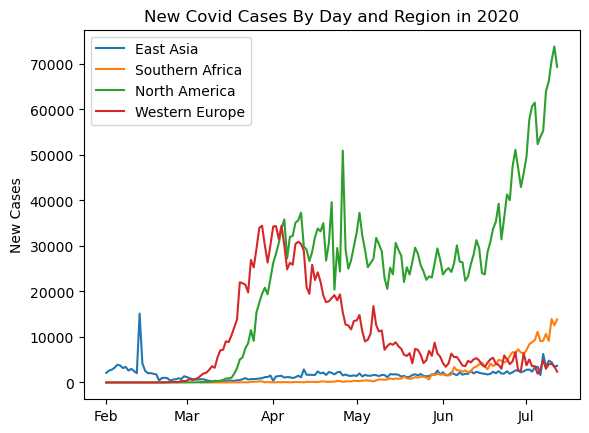

In [11]:
for j in range(len(showregions)):
    rt = regiontotals.loc[regiontotals.region==showregions[j], ['casedate', 'new_cases']]
    plt.plot(rt.casedate, rt.new_cases, label=showregions[j])
    
plt.title('New Covid Cases By Day and Region in 2020')
#"Get Current Axis"의 약자로, 현재 활성화된 축(axes) 객체를 반환
plt.gca().get_xaxis().set_major_formatter(DateFormatter('%b'))
plt.ylabel('New Cases')
plt.legend()
plt.show()

### 스택 플롯으로 아프리카 대륙 남부의 상승세를 면밀히 조사
- 남아프리카 공화국이 아프리카 남부 전체의 추세선을 주도하는지 확인
    - 아프리카 남부만 추출한 데이터 프레임 생성
    - 남아공의 신규 확진자수 시리즈를 추가
    - 아프리카 남부 확진자수에서 남아공 확진자 수를 뺀 새로운 시리즈를 추가 생성

In [12]:
# 아프리카 남부
af = regiontotals.loc[regiontotals.region=='Southern Africa', ['casedate', 'new_cases']].rename(columns={'new_cases':'afcases'})

# 남아공 신규 확진자 수
sa = coviddaily.loc[coviddaily.location=='South Africa', ['casedate', 'new_cases']].rename(columns={'new_cases':'sacases'})

In [13]:
af = pd.merge(af, sa, left_on=['casedate'], right_on=['casedate'], how='left')
af.sacases.fillna(0, inplace = True)

In [16]:
af['afcasesnosa'] = af.afcases - af.sacases

In [17]:
afabb = af.loc[af.casedate.between('2020-04-01', '2020-07-12')]

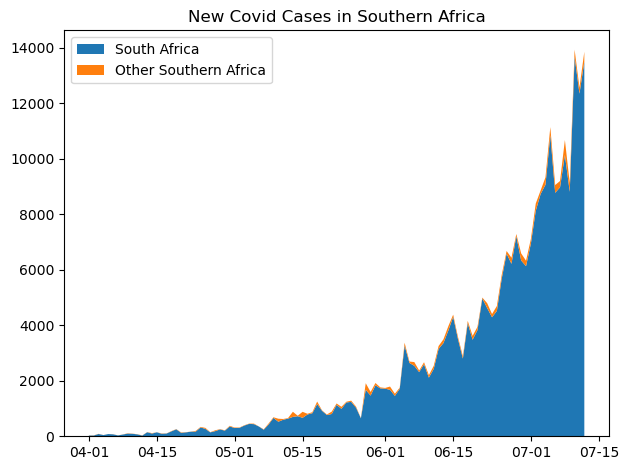

In [21]:
fig = plt.figure()
ax = plt.subplot()
ax.stackplot(afabb.casedate, afabb.sacases, afabb.afcasesnosa, labels=['South Africa', 'Other Southern Africa'])
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))

plt.title('New Covid Cases in Southern Africa')
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

- 위 그래프에서 남아공 확진자 수가 전체 아프리카 남부 확진자수를 주도함을 확인
> 단일 변수의 시간에 따른 추세 조사를 위한 라인플롯과 여러 그룹의 추세를 나타내는 법 확인 완료